# 为什么要用CNN

前面的Mnist手写体，每张图的大小是28x28，这已经非常小了！
但是如果这是用Dense全连接的话，那么首先要把二维图像Flatten()展平为一个“一维数组”，此时输入巨增为784！

但是，现实中的图片分辨率可能是2000x2000，如果还用Dense层先展平的话，那么输入一下变为2000x2000 = 4000000！即仅仅是特征数x就有400万个！
如果再把全连接中的“权重 + 偏置”都算上的话，那占用内存太大了！！！

所以：CNN网络可以处理原始的Dense全连接网络搞不了的大图，变为可能！

—— 因为CNN学习/训练的是“卷积核里的每个数”：每一层中卷积核就是 5x5 = 25 个待训练参数！比原来的4000000小多了。

# CNN操作过程

卷积层 —— 非线性层 —— 池化层/下采样层 —— 全连接层 —— 输出
- **卷积层**：特征的增强，不同的卷积核对不同的特征敏感程度不一样，一个卷积层里有很多的卷积核，它们每个都负责增强自己所擅长/敏感的特征（注意：此时只是把敏感的特征增强了，还没有丢掉那些没被增强认为是非特征的东西，因为此时的图片大小没变！）；

- **池化层/下采样层**：因为原数据2000x2000 = 4000000，图中的特征太多了，必须要把特征提出来，不算特征的东西丢掉！并且经过卷积层后“特征”已经被增强，非特征被削弱，因此用下采样层把图片缩小，其作用就是：明显的特征保留，非特征的丢弃，以此来不断缩小学习范围。

- **全连接层**：由于前面连续好几个“卷积-池化层”搭配，此时图片已经被缩的很小，比如变成了32x32，算上通道数其数据大小为：(32,32,512)；此时特征已经从原来的400万，降到了现在的32x32*512 = 524288个特征（没错。3维数组里都是特征）。这524288个都是有效的、经过提取的特征，比原来400万中有效无效混杂要好的多。

# CNN架构

1. 卷积层：conv2d

2. 非线性变换层/激活层：relu / sigmoid / tanh —— 每一个卷积层后一般都紧跟一个该层

3. 池化层：pooling2d —— 把图片变小

4. 全连接层：w*x + b —— 特征的汇集

## 卷积层4个关键参数：
- filters：卷积核的数量
- kernel_size：卷积核的尺寸大小
- strides：卷积核移动的步长
- padding：是否填充

说明：卷积层里的神经元，其实就是一个个尺寸大小相同的卷积核！filters是该层的卷积核数，其实也就是该层的“神经元数”。网络训练在卷积层中要学习的东西，就是这些尺寸大小相同的卷积核中的数值。

# 一张流程图说明卷积网络到底每层做了什么

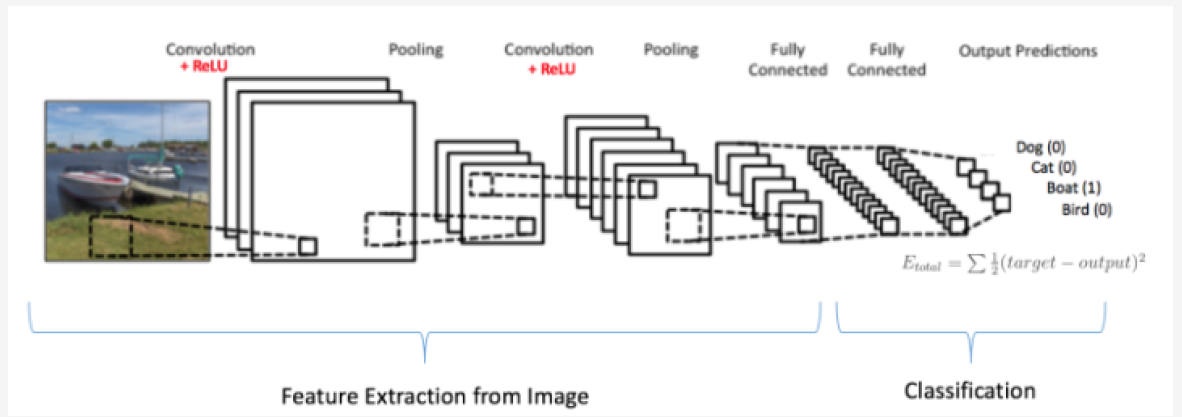


假如原图是64x64：

- 第一卷积层：假如有32个卷积核，那么就会获得32张大小与输入图一样的图！也就是说经过卷积层之后，图片数据变“厚”了，即把不同卷积核(大小相同，内部数值不同)提取的特征堆叠起来；输出的数据是（64,64,32）

- 卷积层输出的结果，先用激活函数relu非线性一下，再输出到下一层；

- 第一下采样层/池化层：有32个池化核（核数和上一卷积层所得到的“厚度”保存一致，即连续的卷积与池化层的核数是一样的），把每张图片减小一般；输出的数据是（32,32,32）

- 第二卷积层：假如有64个卷积核，进一步提取更多的特征并在厚度上堆叠起来，输出的数据变成：(32,32,64)

整个过程是把原始图片数据“**变小变厚**”的过程，变厚是特征提取，变小是降维。

# 输入图片形状

彩色图像：(height, width, channel)
黑白图像：(height, width, 1)  —— 正规的最后都有一个1，如果没有，需要人为reshape出来

layers.Conv2d 中输入数据已经明确要求了：Input shape = (batch, rows, cols, channels)

所以，对于二维数据，必须人为在最后加一维（数据量并没有增多，只是为了凑形状，用np.expand_dim(xxx, axis = -1)）！

**区别**：对于Dense层，它的数据形式为（batch, data_x）

In [4]:
import keras
from keras import layers

In [ ]:
model.add( layers.Conv2D() )